# IMPORTS

In [1]:
import re
import nltk
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup

In [3]:
%matplotlib inline

# Exercise 1

Find out more about sequence objects using Python’s help facility. In the interpreter,
type help(str), help(list), and help(tuple). This will give you a full list of
the functions supported by each type. Some functions have special names flanked
with underscores; as the help documentation shows, each such function corresponds
to something more familiar. For example x.__getitem__(y) is just a longwinded
way of saying x[y].

In [16]:
help(str)

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

In [17]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

In [18]:
help(tuple)

Help on class tuple in module builtins:

class tuple(object)
 |  tuple(iterable=(), /)
 |  
 |  Built-in immutable sequence.
 |  
 |  If no argument is given, the constructor returns an empty tuple.
 |  If iterable is specified the tuple is initialized from iterable's items.
 |  
 |  If the argument is a tuple, the return value is the same object.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(self, key, /)
 |      Return self[key].
 |  
 |  __getnewargs__(self, /)
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __hash__(self, /)
 |      Return hash(self).
 |  
 |  __iter__(self, /)
 |      Implement iter(self).
 |  
 |  __le__(self, value, /)
 |

# Exercise 2

Identify three operations that can be performed on both tuples and lists. Identify
three list operations that cannot be performed on tuples. Name a context where
using a list instead of a tuple generates a Python error.

In [19]:
list_example = [1, 2, 3]
tuple_example = (1, 2, 3)

three operations that can be performed on both tuples and lists

In [20]:
list_example[0], tuple_example[0]

(1, 1)

In [21]:
list_example.index(3), tuple_example.index(3)

(2, 2)

In [22]:
list_example.count(2), tuple_example.count(2)

(1, 1)

 three list operations that cannot be performed on tuples

In [23]:
list_example[1] = 1000

In [24]:
tuple_example[1] = 1000

TypeError: 'tuple' object does not support item assignment

In [ ]:
list_example.append(2)

In [25]:
tuple_example.append(2)

AttributeError: 'tuple' object has no attribute 'append'

In [26]:
list_example.sort()

In [27]:
tuple_example.sort()

AttributeError: 'tuple' object has no attribute 'sort'

Name a context where using a list instead of a tuple generates a Python error

In [28]:
set([i, j] for i, j in zip(range(3), range(3)))

TypeError: unhashable type: 'list'

In [29]:
set((i, j) for i, j in zip(range(3), range(3)))

{(0, 0), (1, 1), (2, 2)}

# Exercise 3

Find out how to create a tuple consisting of a single item. There are at least two
ways to do this.

In [30]:
(1, ), tuple([1])

((1,), (1,))

# Exercise 4

Create a list words = ['is', 'NLP', 'fun', '?']. Use a series of assignment
statements (e.g., words[1] = words[2]) and a temporary variable tmp to transform
this list into the list ['NLP', 'is', 'fun', '!']. Now do the same transformation
using tuple assignment.

In [31]:
words = ['is', 'NLP', 'fun', '?']

In [32]:
tmp = words[0]
words[0] = words[1]
words[1] = tmp
words[-1] = '!'

In [33]:
words

['NLP', 'is', 'fun', '!']

In [34]:
words = ['is', 'NLP', 'fun', '?']

In [35]:
words[0], words[1], words[-1] = words[1], words[0], '!'

In [36]:
words

['NLP', 'is', 'fun', '!']

# Exercise 5

Read about the built-in comparison function cmp, by typing help(cmp). How does
it differ in behavior from the comparison operators?

Thank you, Python 3!

# Exercise 6

Does the method for creating a sliding window of n-grams behave correctly for
the two limiting cases: n = 1 and n = len(sent)?

In [37]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent) - n + 1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [38]:
n = 1
[sent[i:i+n] for i in range(len(sent) - n + 1)]

[['The'], ['dog'], ['gave'], ['John'], ['the'], ['newspaper']]

In [39]:
n = len(sent)
[sent[i:i+n] for i in range(len(sent) - n + 1)]

[['The', 'dog', 'gave', 'John', 'the', 'newspaper']]

In [40]:
list(nltk.ngrams(sent, 3))

[('The', 'dog', 'gave'),
 ('dog', 'gave', 'John'),
 ('gave', 'John', 'the'),
 ('John', 'the', 'newspaper')]

In [41]:
list(nltk.ngrams(sent, 1))

[('The',), ('dog',), ('gave',), ('John',), ('the',), ('newspaper',)]

In [42]:
list(nltk.ngrams(sent, len(sent)))

[('The', 'dog', 'gave', 'John', 'the', 'newspaper')]

# Exercise 7

We pointed out that when empty strings and empty lists occur in the condition
part of an if clause, they evaluate to False. In this case, they are said to be occurring
in a Boolean context. Experiment with different kinds of non-Boolean expressions
in Boolean contexts, and see whether they evaluate as True or False.

In [ ]:
bool(''), bool([]), bool(0)

In [ ]:
bool('abc'), bool([1]), bool(1)

# Exercise 8

Use the inequality operators to compare strings, e.g., 'Monty' < 'Python'. What
happens when you do 'Z' < 'a'? Try pairs of strings that have a common prefix,
e.g., 'Monty' < 'Montague'. Read up on “lexicographical sort” in order to understand
what is going on here. Try comparing structured objects, e.g., ('Monty', 1)
< ('Monty', 2). Does this behave as expected?

In [ ]:
'Monty' < 'Python'

In [ ]:
'Z' < 'a'

In [ ]:
'Monty' < 'Montague'

In [ ]:
('Monty', 1) < ('Monty', 2)

In [ ]:
('Monty', 2) < ('Monty', 1)

In [ ]:
('Monty', 2, 3) < ('Monty', 2, 5)

# Exercise 9

Write code that removes whitespace at the beginning and end of a string, and
normalizes whitespace between words to be a single-space character.<div>
a. Do this task using split() and join().<div>
b. Do this task using regular expression substitutions.

In [ ]:
text = "\t\t\taaa    bbbb  bbb\n\t\n"

In [ ]:
' '.join(text.split())

In [ ]:
re.sub('\s+', ' ', text.strip())

# Exercise 10

Write a program to sort words by length. Define a helper function cmp_len which
uses the cmp comparison function on word lengths.

In [ ]:
words = ['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length']

In [ ]:
sorted(words, key=len)

# Exercise 11

Create a list of words and store it in a variable sent1. Now assign sent2 =
sent1. Modify one of the items in sent1 and verify that sent2 has changed.

In [ ]:
sent1 = ['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length']
sent2 = sent1

In [ ]:
id(sent1), id(sent2)

In [ ]:
list(map(id, sent1)) == list(map(id, sent2))

In [ ]:
sent1[1] = 'b'
sent2

a. Now try the same exercise, but instead assign sent2 = sent1[:]. Modify
sent1 again and see what happens to sent2. Explain.

In [ ]:
sent1 = ['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length']
sent2 = sent1[:]  # Creates a copy of sent1

In [ ]:
id(sent1), id(sent2)

In [ ]:
list(map(id, sent1)) == list(map(id, sent2))

In [ ]:
sent1[1] = 'b'
sent2

In [ ]:
list(map(id, sent1)) == list(map(id, sent2))

b. Now define text1 to be a list of lists of strings (e.g., to represent a text consisting
of multiple sentences). Now assign text2 = text1[:], assign a new value to
one of the words, e.g., text1[1][1] = 'Monty'. Check what this did to text2.
Explain.

In [ ]:
text1 = [['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length', '.'], 
         ['Now', 'assign', 'sent2', '=', 'sent1', '.']]
text2 = text1[:] # Creates the first level copy (shallow copy)

In [ ]:
id(text1), id(text2)

In [ ]:
list(map(id, text1)) == list(map(id, text2))

In [ ]:
text1[1][1] = 'Monty'
text2

c. Load Python’s deepcopy() function (i.e., from copy import deepcopy), consult
its documentation, and test that it makes a fresh copy of any object.

In [ ]:
from copy import deepcopy

In [ ]:
text1 = [['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length', '.'], 
         ['Now', 'assign', 'sent2', '=', 'sent1', '.']]
text2 = deepcopy(text1)  # Creates a deep copy

In [ ]:
text1[1][1] = 'Monty'
text2

# Exercise 12

Initialize an n-by-m list of lists of empty strings using list multiplication, e.g.,
word_table = [[''] * n] * m. What happens when you set one of its values, e.g.,
word_table[1][2] = "hello"? Explain why this happens. Now write an expression
using range() to construct a list of lists, and show that it does not have this problem.

In [ ]:
n, m = 3, 2

In [ ]:
word_table = [[''] * n] * m

In [ ]:
word_table

In [ ]:
word_table[1][2] = "hello"

In [ ]:
word_table

List multiplication duplicates the reference on ['', '', ''] m times. Strings are immutable, while lists aren't

In [ ]:
word_table = [['' for i in range(n)] for j in range(m)]  # No duplicates

In [ ]:
word_table

In [ ]:
word_table[1][2] = "hello"

In [ ]:
word_table

# Exercise 13

Write code to initialize a two-dimensional array of sets called word_vowels and
process a list of words, adding each word to word_vowels[l][v] where l is the length
of the word and v is the number of vowels it contains.

In [ ]:
max_length, max_vowels = 10, 10

In [ ]:
word_vowels = [
    [set() for i in range(max_vowels)] 
    for j in range(max_length)
]

In [ ]:
words = ['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length', '.']

In [ ]:
for word in words:
    l = len(word)
    v = len(re.findall('[aeiou]', word, flags=re.IGNORECASE))
    word_vowels[l][v].add(word)

In [ ]:
word_vowels

In [ ]:
from collections import defaultdict

In [ ]:
word_vowels = defaultdict(lambda: defaultdict(set))

In [ ]:
words = ['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length', '.']

In [ ]:
for word in words:
    l = len(word)
    v = len(re.findall('[aeiou]', word, flags=re.IGNORECASE))
    word_vowels[l][v].add(word)

In [ ]:
word_vowels

# Exercise 14 

Write a function novel10(text) that prints any word that appeared in the last
10% of a text that had not been encountered earlier.

In [ ]:
def novel10(text):
    split_index = int(0.9  * len(text))
    for w in set(text[:split_index]) - set(text[split_index:]):
        print(w)

In [ ]:
text = ['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length', '.', 'a']

In [ ]:
novel10(text)

# Exercise 15

Write a program that takes a sentence expressed as a single string, splits it, and
counts up the words. Get it to print out each word and the word’s frequency, one
per line, in alphabetical order.

In [ ]:
from nltk.probability import FreqDist

In [ ]:
def ex15(sent):
    fd = FreqDist(
        w.lower() 
        for w in nltk.word_tokenize(sent) 
        if w.isalpha()
    )

    for pair in sorted(fd.items()):
        print(pair)

In [ ]:
sent = 'Write a program that takes a sentence expressed as a single string, splits it, and counts up the words.'

In [ ]:
ex15(sent)

# Exercise 16

Read up on Gematria, a method for assigning numbers to words, and for mapping
between words having the same number to discover the hidden meaning of texts
(http://en.wikipedia.org/wiki/Gematria, http://essenes.net/gemcal.htm).

a. Write a function gematria() that sums the numerical values of the letters of a
word, according to the letter values in letter_vals:

In [ ]:
letter_vals = {'a':1, 'b':2, 'c':3, 'd':4, 'e':5, 'f':80, 'g':3, 'h':8,
               'i':10, 'j':10, 'k':20, 'l':30, 'm':40, 'n':50, 'o':70, 'p':80, 'q':100,
               'r':200, 's':300, 't':400, 'u':6, 'v':6, 'w':800, 'x':60, 'y':10, 'z':7}

In [ ]:
def gematria(word):
    return str(sum(letter_vals[c] for c in word))

b. Process a corpus (e.g., nltk.corpus.state_union) and for each document,
count how many of its words have the number 666.

In [ ]:
from nltk.corpus import inaugural
from nltk.probability import ConditionalFreqDist

In [ ]:
cfd = ConditionalFreqDist(
    (fileid, gematria(word.lower()))
    for fileid in inaugural.fileids()
    for word in inaugural.words(fileid)
    if word.isalpha()
)

In [ ]:
for fileid in inaugural.fileids():
    print(fileid, cfd[fileid]['666'])

c. Write a function decode() to process a text, randomly replacing words with
their Gematria equivalents, in order to discover the “hidden meaning” of the
text.

In [ ]:
text = ['Write', 'a', 'program', 'to', 'sort', 'words', 'by', 'length', '.', 'a']

In [ ]:
def decode(text, num_replace=3):
    result = text.copy()
    text_len = len(result)
    for i in range(num_replace):
        w, rnd_ind = '', None
        while not w.isalpha():
            rnd_ind = np.random.randint(text_len)
            w = result[rnd_ind]
        result[rnd_ind] = gematria(result[rnd_ind].lower())
    return result

In [ ]:
decode(text)

# Exercise 17

Write a function shorten(text, n) to process a text, omitting the n most frequently
occurring words of the text. How readable is it?

In [ ]:
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

In [ ]:
def shorten(text, n):
    words = nltk.word_tokenize(text)
    fd = FreqDist(w for w in words if w.isalpha())
    top_n_words = {w for w, freq in fd.most_common(n)}
    text_shorten = ' '.join(w for w in words if w not in top_n_words)
    return text_shorten

In [ ]:
alice_shorten5 = shorten(gutenberg.raw('carroll-alice.txt'), n=5)
alice_shorten5[:1000]  # More or less readable

In [ ]:
alice_shorten10 = shorten(gutenberg.raw('carroll-alice.txt'), n=10)
alice_shorten10[:1000]  # 'Alice', 'Rabbit' have dissappeared

# Exercise 18

Write code to print out an index for a lexicon, allowing someone to look up
words according to their meanings (or their pronunciations; whatever properties
are contained in the lexical entries).

In [76]:
from nltk.corpus import cmudict
from nltk.corpus import wordnet

lexicon = ['this', 'is', 'my', 'list', 'of',
           'words', 'you', 'know', 'what', 'I', 'mean']


def find_pronunciations(look_up_word, pron_dict):
    return pron_dict[look_up_word.lower()]

def find_meanings(look_up_word):
    return [synset.definition()
            for synset in wordnet.synsets(look_up_word)]


def produce_lexical_index(lexicon):
    pron_dict = cmudict.dict()
    return [(word, 
             find_pronunciations(word, pron_dict), 
             find_meanings(word)) 
            for word in lexicon]


index = produce_lexical_index(lexicon)
for line in index:
    print(line)

('this', [['DH', 'IH1', 'S'], ['DH', 'IH0', 'S']], [])
('is', [['IH1', 'Z'], ['IH0', 'Z']], ['have the quality of being; (copula, used with an adjective or a predicate noun)', 'be identical to; be someone or something', 'occupy a certain position or area; be somewhere', 'have an existence, be extant', 'happen, occur, take place; this was during the visit to my parents\' house"', 'be identical or equivalent to', 'form or compose', 'work in a specific place, with a specific subject, or in a specific function', 'represent, as of a character on stage', 'spend or use time', 'have life, be alive', 'to remain unmolested, undisturbed, or uninterrupted -- used only in infinitive form', 'be priced at'])
('my', [['M', 'AY1']], [])
('list', [['L', 'IH1', 'S', 'T']], ['a database containing an ordered array of items (names or topics)', 'the property possessed by a line or surface that departs from the vertical', 'give or make a list of; name individually; give the names of', 'include in a list', 'c

# Exercise 19

Write a list comprehension that sorts a list of WordNet synsets for proximity to
a given synset. For example, given the synsets minke_whale.n.01, orca.n.01,
novel.n.01, and tortoise.n.01, sort them according to their path_distance() from
right_whale.n.01.

In [ ]:
from nltk.corpus import wordnet as wn

In [ ]:
synsets = [
    wn.synset('minke_whale.n.01'),
    wn.synset('orca.n.01'),
    wn.synset('novel.n.01'),
    wn.synset('tortoise.n.01')
]
synsets

In [ ]:
sorted(synsets, key=lambda s: s.shortest_path_distance(wn.synset('right_whale.n.01')))

# Exercise 20

Write a function that takes a list of words (containing duplicates) and returns a
list of words (with no duplicates) sorted by decreasing frequency. E.g., if the input
list contained 10 instances of the word table and 9 instances of the word chair,
then table would appear before chair in the output list.

In [ ]:
from nltk.probability import FreqDist

In [ ]:
words = ['table'] * 10 + ['chair'] * 9

In [ ]:
def ex20(words):
    fd = FreqDist(words)
    return [w for w, f in fd.most_common()]

In [ ]:
ex20(words)

# Exercise 21

Write a function that takes a text and a vocabulary as its arguments and returns
the set of words that appear in the text but not in the vocabulary. Both arguments
can be represented as lists of strings. Can you do this in a single line, using set.difference()?

In [ ]:
def ex21(text, vocabulary):
    return set(text).difference(vocabulary)

In [ ]:
ex21(['ababa', 'bbb', 'vvvv'], ['vvvv'])

# Exercise 22

Import the itemgetter() function from the operator module in Python’s standard
library (i.e., from operator import itemgetter). Create a list words containing several words. Now try calling: sorted(words, key=itemgetter(1)), and sor
ted(words, key=itemgetter(-1)). Explain what itemgetter() is doing.

In [ ]:
words = ['ababc', 'bbz', 'vvvvm']

In [ ]:
from operator import itemgetter

In [ ]:
sorted(words, key=itemgetter(0))

In [ ]:
sorted(words, key=itemgetter(-1))

itemgetter(i) gets i-th value of the word 

# Exercise 23

Write a recursive function lookup(trie, key) that looks up a key in a trie, and
returns the value it finds. Extend the function to return a word when it is uniquely
determined by its prefix (e.g., vanguard is the only word that starts with vang-, so
lookup(trie, 'vang') should return the same thing as lookup(trie, 'vanguard')).

In [4]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

In [5]:
trie = nltk.defaultdict(dict)

insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
insert(trie, 'vanguard', 'beef')
trie = dict(trie)

In [6]:
trie['c']['h']['a']['t']['value']

'cat'

In [59]:
def lookup(trie, key):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            raise KeyError('No such key!')
        return lookup(trie[first], rest)
    else:
        if 'value' in trie:
            return trie['value']
        elif len(trie) == 1:
            return lookup(list(trie.values())[0], '')
        elif len(trie) > 1:
            raise KeyError('No such key!')     

In [60]:
lookup(trie, 'chat')

'cat'

In [61]:
lookup(trie, 'cha')

KeyError: 'No such key!'

In [62]:
lookup(trie, 'vang'), lookup(trie, 'vanguard')

('beef', 'beef')

# Exercise 24

Read up on “keyword linkage” (Chapter 5 of (Scott & Tribble, 2006)). Extract
keywords from NLTK’s Shakespeare Corpus and using the NetworkX package,
plot keyword linkage networks.

The article wasn't found

# Exercise 25

Read about string edit distance and the Levenshtein Algorithm. Try the implementation
provided in nltk.edit_dist(). In what way is this using dynamic programming?
Does it use the bottom-up or top-down approach? (See also http://norvig.com/spell-correct.html.)

In [ ]:
nltk.edit_distance('kitten', 'sitting')

This algorithm, an example of bottom-up dynamic programming (please see https://en.wikipedia.org/wiki/Levenshtein_distance#Iterative_with_full_matrix)

# Exercise 26

The Catalan numbers arise in many applications of combinatorial mathematics,
including the counting of parse trees (Section 8.6). The series can be defined as
follows: C0 = 1, and Cn+1 = Σ0..n (CiCn-i).

1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862

a. Write a recursive function to compute nth Catalan number Cn.

In [8]:
def catalan_recursive(n):
    if n == 0: 
        return 1
    return sum(
        catalan_recursive(i) 
        * catalan_recursive(n - 1 - i) 
        for i in range(n)
    )

In [9]:
list(map(catalan_recursive, range(10)))

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

b. Now write another function that does this computation using dynamic programming.

In [10]:
def catalan_dynamic(n):
    numbers = [1]
    for j in range(1, n + 1):
        numbers.append(sum(numbers[i] * numbers[j - 1 - i] for i in range(j)))
    return numbers[n]

In [11]:
list(map(catalan_dynamic, range(10)))

[1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862]

c. Use the timeit module to compare the performance of these functions as n
increases.

In [12]:
%%timeit

catalan_recursive(10)

102 ms ± 2.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
%%timeit

catalan_recursive(12)

913 ms ± 6.26 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
%%timeit

catalan_dynamic(10)

64.5 µs ± 632 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [15]:
%%timeit

catalan_dynamic(12)

84.4 µs ± 1.76 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Exercise 27

Reproduce some of the results of (Zhao & Zobel, 2007) concerning authorship
identification.

The article wasn't found

# Exercise 28

Study gender-specific lexical choice, and see if you can reproduce some of the
results of http://www.clintoneast.com/articles/words.php.

In [16]:
import newspaper

In [17]:
def extract_articles(news_source='http://cnn.com', num=10):
    news_source = newspaper.build(news_source, memoize_articles=False)
    output = []
    for art in news_source.articles[:min(num, len(news_source.articles))]:
        art.download()
        art.parse()
        raw = art.text
        output.extend(nltk.word_tokenize(raw))
    return output

In [18]:
def find_common(txt=nltk.corpus.brown.words(), num=10, remove_stopwords=True):
    txt = [wd.lower() for wd in txt if wd.isalpha()]
    if remove_stopwords:
        stopwords = set(nltk.corpus.stopwords.words('english'))
        txt = [wd for wd in txt if wd not in stopwords]
    fdist = nltk.FreqDist(txt)
    return [wd[0] for wd in fdist.most_common(num)]

In [19]:
def find_signature(txt=nltk.corpus.brown.words(), sign_length=100, remove_stopwords=False):
    txt = [wd.lower() for wd in txt if wd.isalpha()]
    if remove_stopwords:
        stopwords = nltk.corpus.stopwords.words('english')
        txt = [wd for wd in txt if wd not in stopwords]
    fdist = nltk.FreqDist(txt)
    return [(wd[0], i) for (i, wd) in enumerate(fdist.most_common(sign_length))]

In [32]:
def spearman_correlation(x, y):
    intersection = set(w for w, r in x) & set(w for w, r, in y)
    x_seq = [w for w, r in x if w in intersection]
    y_seq = [w for w, r in y if w in intersection]
    x_new = [(w, i) for i, w in enumerate(x_seq)]
    y_new = [(w, i) for i, w in enumerate(y_seq)]
    return nltk.spearman_correlation(x_new, y_new)

In [20]:
female_magazines = ['http://www.elle.com', 'http://www.cosmopolitan.com']
fem = []
for src in female_magazines:
    fem.extend(extract_articles(src, num=100))
fem_mc = find_common(fem, 25)
fem_t = nltk.Text(fem)

In [21]:
male_magazines = ['http://www.maxim.com']
mal = []
for src in male_magazines:
    mal.extend(extract_articles(src, num=100))
mal_mc = find_common(mal, 25)
mal_t = nltk.Text(mal)

In [37]:
com_mc = sorted(set(mal_mc) & set(fem_mc))
print(com_mc)

['like', 'one', 'time']


In [34]:
fem_sig_ws = find_signature(fem, sign_length=1000, remove_stopwords=False)
fem_sig_ns = find_signature(fem, sign_length=1000, remove_stopwords=True)
mal_sig_ws = find_signature(mal, sign_length=1000, remove_stopwords=False)
mal_sig_ns = find_signature(mal, sign_length=1000, remove_stopwords=True)

In [35]:
test_src = ['http://www.elle.com', 'http://www.cosmopolitan.com', 'http://www.maxim.com']
lst = []
for src in test_src:
    txt = extract_articles(src, num=10)
    txt_sig_ws = find_signature(txt, sign_length=1000, remove_stopwords=False)
    txt_sig_ns = find_signature(txt, sign_length=1000, remove_stopwords=True)
    lst.append([src,
                spearman_correlation(txt_sig_ws, fem_sig_ws),
                spearman_correlation(txt_sig_ns, fem_sig_ns),
                spearman_correlation(txt_sig_ws, mal_sig_ws),
                spearman_correlation(txt_sig_ns, mal_sig_ns)])

In [36]:
lst

[['http://www.elle.com',
  0.5357635467980295,
  0.44305774082413263,
  0.4864369501466276,
  0.2599890530925014],
 ['http://www.cosmopolitan.com',
  0.4858386286389833,
  0.577570093457944,
  0.11363442329036111,
  0.04972247918593897],
 ['http://www.maxim.com',
  0.5602505281914791,
  0.3034359244980749,
  0.577335486381775,
  0.41006899232975336]]

# Exercise 29

Write a recursive function that pretty prints a trie in alphabetically sorted order,
for example:<div>
chair: 'flesh'<div>
---t: 'cat'<div>
--ic: 'stylish'<div>
---en: 'dog'

In [124]:
def pretty_print(trie, d=0):
    for i, key in enumerate(sorted(trie)):
        if key == 'value':
            print(': ' + trie[key])
        else:
            print(('-' * d) * (i != 0) + key, end='')
            pretty_print(trie[key], d + 1)

In [125]:
pretty_print(trie)

chair: flesh
---t: cat
--ic: stylish
---en: dog
vanguard: beef


# Exercise 30

With the help of the trie data structure, write a recursive function that processes
text, locating the uniqueness point in each word, and discarding the remainder of
each word. How much compression does this give? How readable is the resulting
text?

In [22]:
from nltk.corpus import gutenberg

In [23]:
def compress(trie, key):
    subtrie = trie
    for c in key[:-1]:
        subtrie = subtrie[c]
    if len(subtrie) == 1:
        return compress(trie, key[:-1])
    else:
        return key

In [24]:
trie = nltk.defaultdict(dict)

for word in gutenberg.words('carroll-alice.txt'):
    insert(trie, word.lower(), None)

In [25]:
' '.join(w.lower() for w in gutenberg.words('carroll-alice.txt')[:100])

"[ alice ' s adventures in wonderland by lewis carroll 1865 ] chapter i . down the rabbit - hole alice was beginning to get very tired of sitting by her sister on the bank , and of having nothing to do : once or twice she had peeped into the book her sister was reading , but it had no pictures or conversations in it , ' and what is the use of a book ,' thought alice ' without pictures or conversation ?' so she was considering in her own mind ( as well as she could ,"

In [26]:
' '.join(compress(trie, w.lower()) for w in gutenberg.words('carroll-alice.txt')[:100])

"[ alic ' s adve in wonderl by lew carro 1 ] chap i . dow the rab - hole alic was beginn to get very tir of sitt by her sis on the bank , and of havi noth to do : onc or twic she had peepe into the book her sis was readin , but it had no pictures or conversations in it , ' and wha is the use of a book ,' thought alic ' witho pictures or conv ?' so she was consideri in her own mind ( as well as she coul ,"

The text is still readable. This approach gives about 10%-15% of compression on average.

# Exercise 31

Obtain some raw text, in the form of a single, long string. Use Python’s text
wrap module to break it up into multiple lines. Now write code to add extra spaces
between words, in order to justify the output. Each line must have the same width,
and spaces must be approximately evenly distributed across each line. No line can
begin or end with a space.

In [74]:
from textwrap import wrap

In [75]:
def paste_space(line, width, idxs=None):
    if idxs is None:
        idxs = [i for i, c in enumerate(line) if c == ' ']
    if len(line) == width:
        return line
    i = np.random.randint(len(idxs))
    return paste_space(
        line=line[:idxs[i]] + '  ' + line[idxs[i]+1:],
        idxs=idxs[:i+1] + [idx + 1 for idx in idxs[i+1:]],
        width=width
    )

In [76]:
def justify(text, width):
    lines = wrap(text)
    return '\n'.join(paste_space(line, width) for line in lines)

In [77]:
text = "Obtain some raw text, in the form of a single, long string. Use Python’s text wrap module to break \
it up into multiple lines. Now write code to add extra spaces between words, in order to justify the output. \
Each line must have the same width, and spaces must be approximately evenly distributed across each line. No \
line can begin or end with a space."

In [78]:
print(text)

Obtain some raw text, in the form of a single, long string. Use Python’s text wrap module to break it up into multiple lines. Now write code to add extra spaces between words, in order to justify the output. Each line must have the same width, and spaces must be approximately evenly distributed across each line. No line can begin or end with a space.


In [82]:
print(justify(text, 100))

Obtain     some   raw      text,   in  the   form      of     a   single,      long   string.    Use
Python’s    text    wrap   module     to    break      it  up    into      multiple     lines.   Now
write  code   to    add     extra   spaces       between    words,     in   order to    justify  the
output.       Each    line    must      have     the     same  width,    and   spaces      must   be
approximately   evenly    distributed      across  each       line.   No   line        can     begin
or                        end                  with                         a                 space.


# Exercise 32

Develop a simple extractive summarization tool, that prints the sentences of a
document which contain the highest total word frequency. Use FreqDist() to count
word frequencies, and use sum to sum the frequencies of the words in each sentence.
Rank the sentences according to their score. Finally, print the n highest-scoring
sentences in document order. Carefully review the design of your program,
especially your approach to this double sorting. Make sure the program is written
as clearly as possible.

In [136]:
from operator import itemgetter
from nltk.corpus import gutenberg
from nltk.probability import FreqDist

In [137]:
def get_top_score_sents(words, sents, top_n=5):
    fd = FreqDist(w.lower() for w in words)
    score_sent = [
        (sum(fd[w.lower()] for w in sent), ' '.join(sent))
        for sent in sents
    ]
    return sorted(score_sent, key=itemgetter(0), reverse=True)[:top_n]

In [138]:
sents = gutenberg.sents('carroll-alice.txt')
words = gutenberg.words('carroll-alice.txt')

In [139]:
get_top_sents(words, sents)

[(87909,
  'Hardly knowing what she did , she picked up a little bit of stick , and held it out to the puppy ; whereupon the puppy jumped into the air off all its feet at once , with a yelp of delight , and rushed at the stick , and made believe to worry it ; then Alice dodged behind a great thistle , to keep herself from being run over ; and the moment she appeared on the other side , the puppy made another rush at the stick , and tumbled head over heels in its hurry to get hold of it ; then Alice , thinking it was very like having a game of play with a cart - horse , and expecting every moment to be trampled under its feet , ran round the thistle again ; then the puppy began a series of short charges at the stick , running a very little way forwards each time and a long way back , and barking hoarsely all the while , till at last it sat down a good way off , panting , with its tongue hanging out of its mouth , and its great eyes half shut .'),
 (77847,
  'The chief difficulty Alice f

#  Exercise 33

Develop your own NgramTagger class that inherits from NLTK’s class, and which
encapsulates the method of collapsing the vocabulary of the tagged training and
testing data that was described in Chapter 5. Make sure that the unigram and
default backoff taggers have access to the full vocabulary.

I don't know how to implement it yet

# Exercise 34 (Review)

Read the following article on semantic orientation of adjectives. Use the NetworkX
package to visualize a network of adjectives with edges to indicate same
versus different semantic orientation (see http://www.aclweb.org/anthology/P97-1023 ).

In [28]:
import networkx as nx
from nltk.corpus import brown

In [29]:
def semantic_orientation_map(tagged_words, with_labels=False):
    edges = [
        (w1.lower(), w3.lower(), {'color': 'r' if w2 == 'but' else 'g'})
        for (w1, t1), (w2, t2), (w3, t3) 
        in nltk.trigrams(tagged_words)
        if t1 == 'ADJ' and w2 in ('and', 'but', 'or') and t3 == 'ADJ'
    ]
    
    graph = nx.Graph()
    graph.add_edges_from(edges)
    nx.draw_circular(
        G=graph,
        with_labels=with_labels,
        node_color='b',
        node_size=10,
        edge_color=[color for w1, w2, color in graph.edges.data('color')]
    )

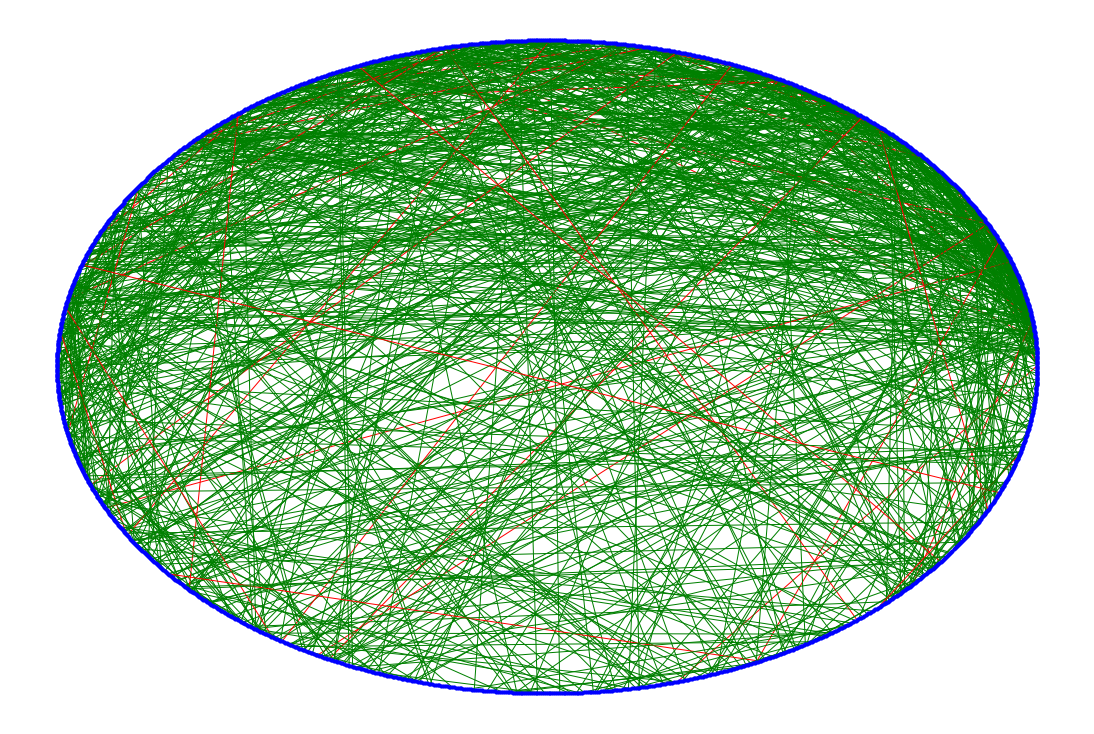

In [30]:
plt.figure(figsize=(15, 10))
semantic_orientation_map(brown.tagged_words(tagset='universal'))
plt.show()

# Exercise 35

Design an algorithm to find the “statistically improbable phrases” of a document
collection (see http://www.amazon.com/gp/search-inside/sipshelp.html ).

The article wasn't found

# Exercise 36 (Review)

Write a program to implement a brute-force algorithm for discovering word
squares, a kind of n × n: crossword in which the entry in the nth row is the same
as the entry in the nth column. For discussion, see http://itre.cis.upenn.edu/~myl/languagelog/archives/002679.html .

In [61]:
from nltk.corpus import words
from itertools import product

In [62]:
def find_word_squares(n):
    results = []
    words_set = set(w.lower() for w in words.words() if len(w) == n)
    for comb in product(words_set, repeat=n):
        char_array = np.array(list(map(list, comb)))
        if (char_array == char_array.T).all():
            results.append(comb)
    return results

In [63]:
sqs2 = find_word_squares(2)
len(sqs2)

1214

In [64]:
print(*sqs2[0], sep='\n')

um
me


In [68]:
sqs3 = find_word_squares(3)
len(sqs3)

KeyboardInterrupt: 

In [ ]:
print(*sqs3[0], sep='\n')